In [1]:
import numpy as np
# from arsf_envi_reader import envi_header


import json
import math
# import affine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from osgeo import gdal,ogr,osr


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from scipy.stats import gaussian_kde

# from tqdm import tqdm
# import multiprocess as mp
from numpy import trapz

In [2]:
# Open the raster and read it as an array
site1b_data = gdal.Open(r'F:\site2a_d13c\site2a_d13c\d13c_site2a_10_12.tif').ReadAsArray().flatten()

# Filter out zeros
site1b_data = site1b_data[site1b_data != 0]

In [3]:
print(site1b_data.shape, site1b_data)

(27407,) [-28.603607 -28.593666 -28.593515 ... -28.348763 -28.356194 -28.343588]


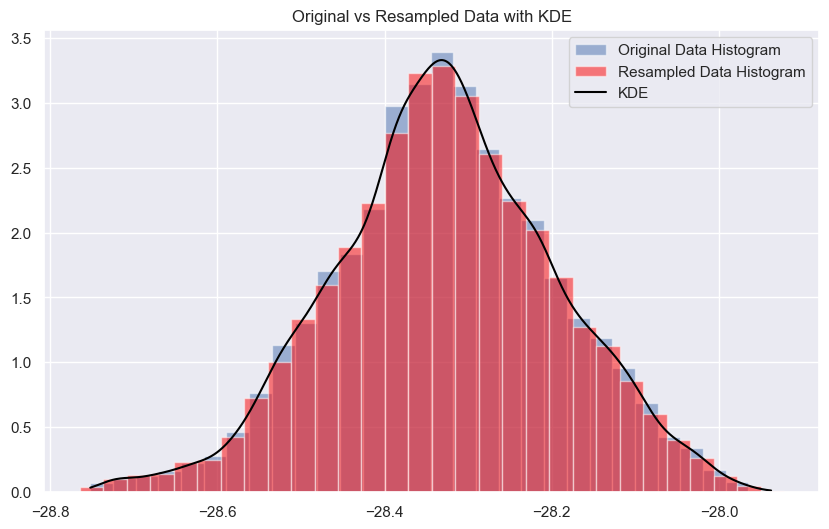

In [5]:
# Assuming site2a_data is already defined
kde2 = gaussian_kde(site1b_data)
x2 = np.linspace(np.min(site1b_data), np.max(site1b_data), 1000)
pdf2 = kde2(x2)

# Resample from the KDE
n_samples = len(site1b_data)
new_data = kde2.resample(n_samples).flatten()

# Plotting
plt.figure(figsize=(10,6))

# Histogram of the original data
plt.hist(site1b_data, bins=30, density=True, alpha=0.5, label="Original Data Histogram")

# Histogram of the resampled data
plt.hist(new_data, bins=30, density=True, alpha=0.5, color='red', label="Resampled Data Histogram")

# KDE estimate
plt.plot(x2, pdf2, color='black', label="KDE")

plt.legend()
plt.title("Original vs Resampled Data with KDE")
plt.show()

In [6]:
kde1 = gaussian_kde(site1b_data)
x1 = np.linspace(np.min(site1b_data), np.max(site1b_data), 1000)
pdf1 = kde1(x1)



n_samples = len(site1b_data)
new_data = kde1.resample(n_samples).flatten()


x_new = np.linspace(np.min(new_data), np.max(new_data), 1000)        
#original data corresponding maximum density
x1_max_density = x1[np.argmax(pdf1)]
# origin_ymax.append((x1_max_density,site1b))
x1_std_value = np.std(x1)
# origin_std.append((x1_std_value, site1b))

# Creating the KDE for the resampled data
kde_new_data = gaussian_kde(new_data)
pdf_new_data = kde_new_data(x_new)
resampled_max_density = x_new[np.argmax(pdf_new_data)]
# resampled_ymax.append((resampled_max_density, site1b))

resampled_std_value = np.std(new_data)
# resampled_std.append((resampled_std_value, site1b))
print(x1_max_density, resampled_max_density)

-28.332173476348053 -28.334765410780577


(array([0.03547109, 0.03990498, 0.11675901, 0.14484019, 0.20617572,
        0.25642643, 0.50768   , 1.13507473, 1.65679528, 1.96864524,
        1.66861912, 1.93760804, 1.93169619, 1.81789312, 1.80902568,
        1.52599593, 1.39150087, 1.33977269, 1.09886486, 0.9451568 ,
        0.66582147, 0.66508297, 0.50546306, 0.27490116, 0.13966732,
        0.10715218, 0.08498289, 0.12636567, 0.09976252, 0.0569015 ]),
 array([-0.4302108 , -0.3889907 , -0.3477706 , -0.3065505 , -0.26533037,
        -0.22411028, -0.18289018, -0.14167008, -0.10044997, -0.05922987,
        -0.01800976,  0.02321034,  0.06443045,  0.10565055,  0.14687066,
         0.18809076,  0.22931086,  0.27053097,  0.31175107,  0.35297117,
         0.39419127,  0.43541139,  0.47663149,  0.51785159,  0.55907166,
         0.60029179,  0.64151192,  0.68273199,  0.72395211,  0.76517218,
         0.80639231]),
 <BarContainer object of 30 artists>)

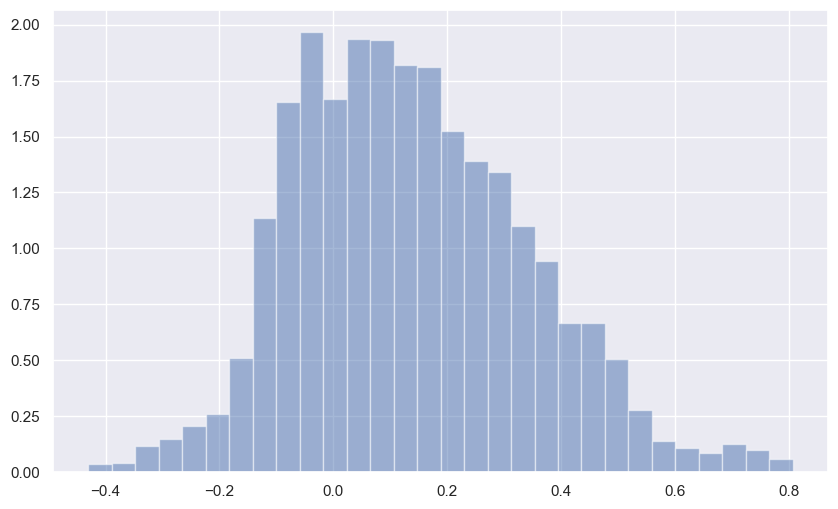

In [19]:
plt.figure(figsize=(10,6))

# Histogram of the original data
plt.hist(site2a_data, bins=30, density=True, alpha=0.5, label="Original Data Histogram")

(array([0.01089342, 0.03199942, 0.08238147, 0.13344437, 0.17020966,
        0.25803784, 0.47862955, 0.98040762, 1.6129067 , 1.82464751,
        1.87775292, 1.85188106, 1.86073196, 1.84643435, 1.63673605,
        1.44065453, 1.35418802, 1.24593468, 0.93138724, 0.76662429,
        0.6134356 , 0.48135291, 0.27437797, 0.14501863, 0.11778508,
        0.10621083, 0.10689166, 0.08170063, 0.02519103, 0.00340419]),
 array([-0.46395214, -0.41921191, -0.37447169, -0.32973146, -0.28499124,
        -0.24025101, -0.19551079, -0.15077056, -0.10603034, -0.06129011,
        -0.01654989,  0.02819034,  0.07293056,  0.11767079,  0.16241101,
         0.20715124,  0.25189146,  0.29663168,  0.34137191,  0.38611213,
         0.43085236,  0.47559258,  0.52033281,  0.56507303,  0.60981326,
         0.65455348,  0.69929371,  0.74403393,  0.78877416,  0.83351438,
         0.87825461]),
 <BarContainer object of 30 artists>)

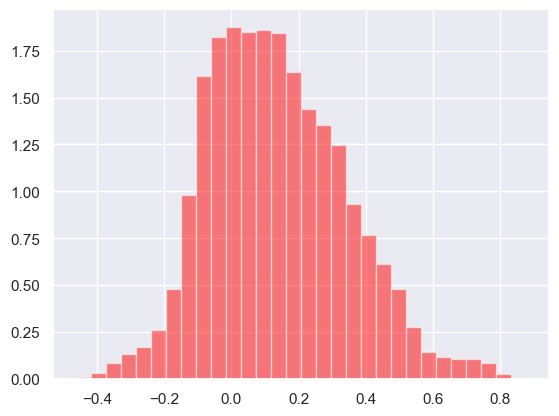

In [20]:
# Histogram of the resampled data
plt.hist(new_data, bins=30, density=True, alpha=0.5, color='red', label="Resampled Data Histogram")

In [15]:
kde2 = gaussian_kde(site2a_data)
x2 = np.linspace(np.min(site2a_data), np.max(site2a_data), 1000)
pdf2 = kde2(x2)

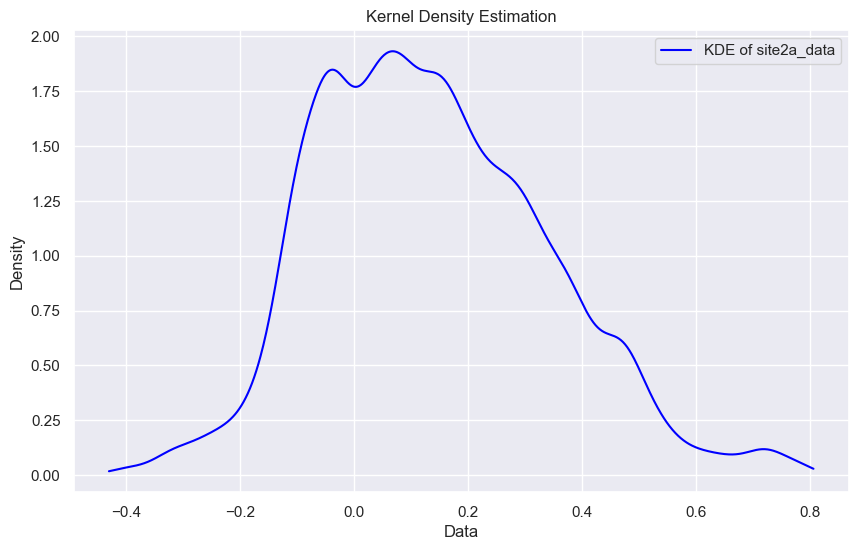

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x2, pdf2, label='KDE of site2a_data', color='blue')
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
xmin = la_trait_img.min()
xmax = la_trait_img.max()
xmin, xmax

(-0.4302108, 0.8063923)

In [4]:
eval_points = np.linspace(np.min(la_trait_img), np.max(la_trait_img))

In [5]:
eval_points

array([-0.4302108 , -0.404974  , -0.3797372 , -0.3545004 , -0.32926361,
       -0.30402681, -0.27879001, -0.25355321, -0.22831641, -0.20307962,
       -0.17784282, -0.15260602, -0.12736922, -0.10213242, -0.07689562,
       -0.05165883, -0.02642203, -0.00118523,  0.02405157,  0.04928837,
        0.07452516,  0.09976196,  0.12499876,  0.15023556,  0.17547236,
        0.20070916,  0.22594595,  0.25118275,  0.27641955,  0.30165635,
        0.32689315,  0.35212994,  0.37736674,  0.40260354,  0.42784034,
        0.45307714,  0.47831394,  0.50355073,  0.52878753,  0.55402433,
        0.57926113,  0.60449793,  0.62973472,  0.65497152,  0.68020832,
        0.70544512,  0.73068192,  0.75591872,  0.78115551,  0.80639231])

In [9]:
kde1 = gaussian_kde(la_trait_img)
pdf1 = kde1(eval_points)

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn.neighbors import KernelDensity


In [9]:
x = la_trait_img.reshape([-1,1])
x.shape

(28798142, 1)

In [12]:
kde_sk = KernelDensity(bandwidth=0.001, kernel='gaussian')
kde_sk.fit(la_trait_img.reshape([-1,1]))
y_sk = np.exp(kde_sk.score_samples(eval_points.reshape(-1,1)))

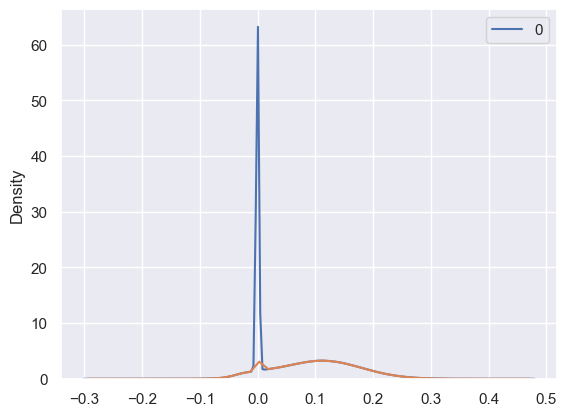

In [13]:
sns.kdeplot(x)
plt.plot(eval_points, y_sk)

In [15]:
kde_sp = gaussian_kde(x, bw_method=0.001)
y_sp = kde_sp.pdf(eval_points)

ValueError: Number of dimensions is greater than number of samples. This results in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Note that `gaussian_kde` interprets each *column* of `dataset` to be a point; consider transposing the input to `dataset`.

In [ ]:
sns.kdeplot(la_trait_img)
plt.plot(eval_points, y_sk)
plt.plot(eval_points, y_sp)
plt.legend(['seaborn','scikit','scipy'])

In [5]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(la_trait_img)
f = kde.covariance_factor()
bw = f * la_trait_img.std()

In [6]:
x_grid  = np.linspace(np.min(la_trait_img), np.max(la_trait_img))

In [8]:
from pylab import plot
plot(x_grid, kde.evaluate(x_grid))

ValueError: points have dimension 1, dataset has dimension 5218

In [5]:
d1, d2 = la_trait_img.shape
la_trait_img_reshaped = la_trait_img.reshape((d1*d2))
la_trait_img_reshaped.shape

(28798142,)

In [6]:
la_trait_img_reshaped

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [13]:
xmin = la_trait_img_reshaped.min()
xmax = la_trait_img_reshaped.max()
xmin, xmax

(-0.29392788, 0.47192937)

In [15]:
from scipy import stats

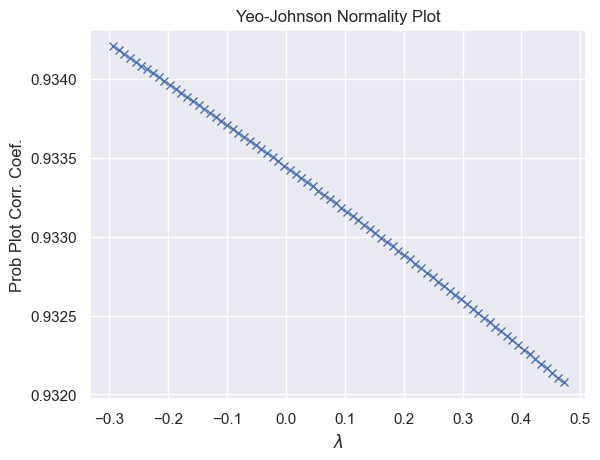

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.yeojohnson_normplot(la_trait_img_reshaped, xmin, xmax, plot=ax)

In [18]:
_, maxlog = stats.yeojohnson(la_trait_img_reshaped)
ax.axvline(maxlog, color='r')

In [19]:
plt.show()

In [20]:
import numpy as np
import scipy.stats as stats

kde = stats.gaussian_kde(la_trait_img_reshaped)
xs = np.linspace(xmin, xmax, num=500)
y1 = kde(xs)
kde.set_bandwidth(bw_method='silverman')
# y2 = kde(xs)
# kde.set_bandwidth(bw_method=kde.factor / 3.)
# y3 = kde(xs)

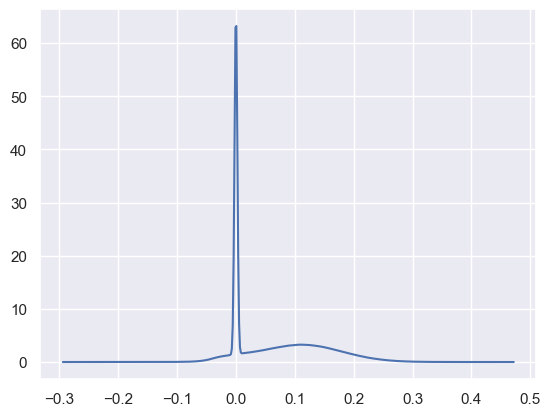

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# ax.plot(x1, np.full(x1.shape, 1 / (4. * x1.size)), 'bo',
# #         label='Data points (rescaled)')
ax.plot(xs, y1, label='Scott (default)')
